In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
powerconsumption_filename = 'household_power_consumption.txt'
powerconsumption_file = open(powerconsumption_filename)
powerconsumption_data = powerconsumption_file.read()
powerconsumption_file.close()

print(len(powerconsumption_data))
print(powerconsumption_data[:200])

130885495
Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;1


In [3]:
lines = powerconsumption_data.split('\n')
print(len(lines))
for i in range(5):
    print(lines[:i])

2075261
[]
['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3']
['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3', '16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000']
['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3', '16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000', '16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000']
['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3', '16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000', '16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000', '16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000']


In [4]:
labels = lines[0]
values = lines[1:]
n_values = len(values)

print(labels)
for i in range(10):
    print(values[i])

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000
16/12/2006;17:33:00;3.662;0.510;233.860;15.800;0.000;2.000;16.000


In [7]:
Date = [];                      j_Date = 0
Time = [];                      j_Time = 1
Global_active_power = [];       j_Global_active_power = 2
Global_reactive_power = [];     j_Global_reactive_power = 3
Voltage = [];                   j_Voltage = 4
Global_intensity = [];          j_Global_intensity = 5
Sub_metering_1 = [];            j_Sub_metering_1 = 6
Sub_metering_2 = [];            j_Sub_metering_2 = 7
Sub_metering_3 = [];            j_Sub_metering_3 = 8
Timestamp = [];
missing = np.nan

for i_row in range(n_values):
    row_split_values = values[i_row].split(';')
    
    if len(row_split_values) >= j_Sub_metering_3:
        stamp = pd.Timestamp(str(row_split_values[j_Date]) + " - " + str(row_split_values[j_Time]))
        Timestamp.append(stamp)
        if row_split_values[j_Global_active_power] != '?':
            Date.append(str(row_split_values[j_Date]))
            Time.append(str(row_split_values[j_Time]))
            Global_active_power.append(float(row_split_values[j_Global_active_power]))
            Global_reactive_power.append(float(row_split_values[j_Global_reactive_power]))
            Voltage.append(float(row_split_values[j_Voltage]))
            Global_intensity.append(float(row_split_values[j_Global_intensity]))
            Sub_metering_1.append(float(row_split_values[j_Sub_metering_1]))
            Sub_metering_2.append(float(row_split_values[j_Sub_metering_2]))
            Sub_metering_3.append(float(row_split_values[j_Sub_metering_3]))
        else:
            Date.append(str(row_split_values[j_Date]))
            Time.append(str(row_split_values[j_Time]))
            Global_active_power.append(missing)
            Global_reactive_power.append(missing)
            Voltage.append(missing)
            Global_intensity.append(missing)
            Sub_metering_1.append(missing)
            Sub_metering_2.append(missing)
            Sub_metering_3.append(missing)


In [8]:
# Missing value
for i_date in range(5):
    print(Timestamp[i_date + 6837], Time[i_date + 6837], Global_intensity[i_date + 6837])

2006-12-21 11:21:00 11:21:00 1.0
2006-12-21 11:22:00 11:22:00 1.0
2006-12-21 11:23:00 11:23:00 nan
2006-12-21 11:24:00 11:24:00 nan
2006-12-21 11:25:00 11:25:00 1.0


In [9]:
import pandas as pd
columns = ["Date",
           "Time",
           "Global_active_power",
           "Global_reactive_power",
           "Voltage",
           "Global_intensity",
           "Sub_metering_1",
           "Sub_metering_2",
           "Sub_metering_3"]
powerdata = pd.DataFrame(columns = columns)

In [10]:
powerdata["Date"] = Date
powerdata["Time"] = Time
powerdata["Global_active_power"] = Global_active_power
powerdata["Global_reactive_power"] = Global_reactive_power
powerdata["Voltage"] = Voltage
powerdata["Global_intensity"] = Global_intensity
powerdata["Sub_metering_1"] = Sub_metering_1
powerdata["Sub_metering_2"] = Sub_metering_2
powerdata["Sub_metering_3"] = Sub_metering_3

In [11]:
powerdata.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
powerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [13]:
powerdata.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
powerdata.iloc[6838:6842]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6838,21/12/2006,11:22:00,0.244,0.0,242.29,1.0,0.0,0.0,0.0
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6841,21/12/2006,11:25:00,0.246,0.0,241.74,1.0,0.0,0.0,0.0


In [15]:
powerdata.index = Timestamp

In [16]:
powerdata.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


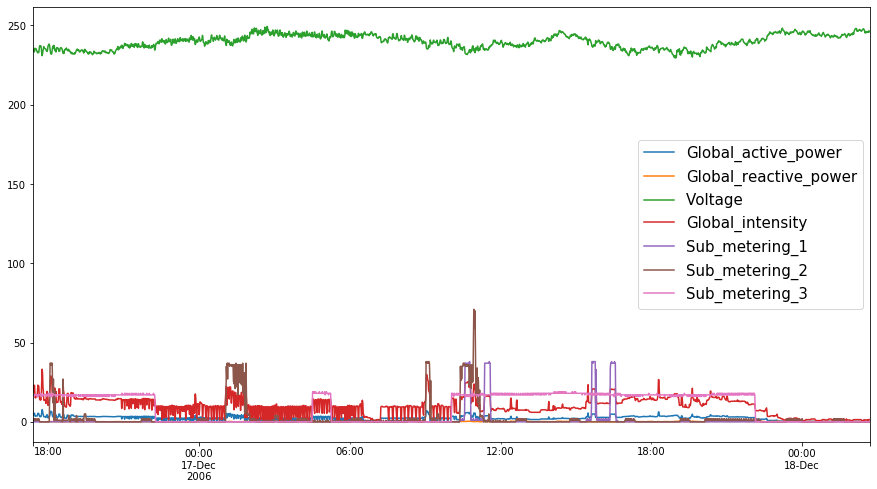

In [17]:
powerdata.iloc[:2000].plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()

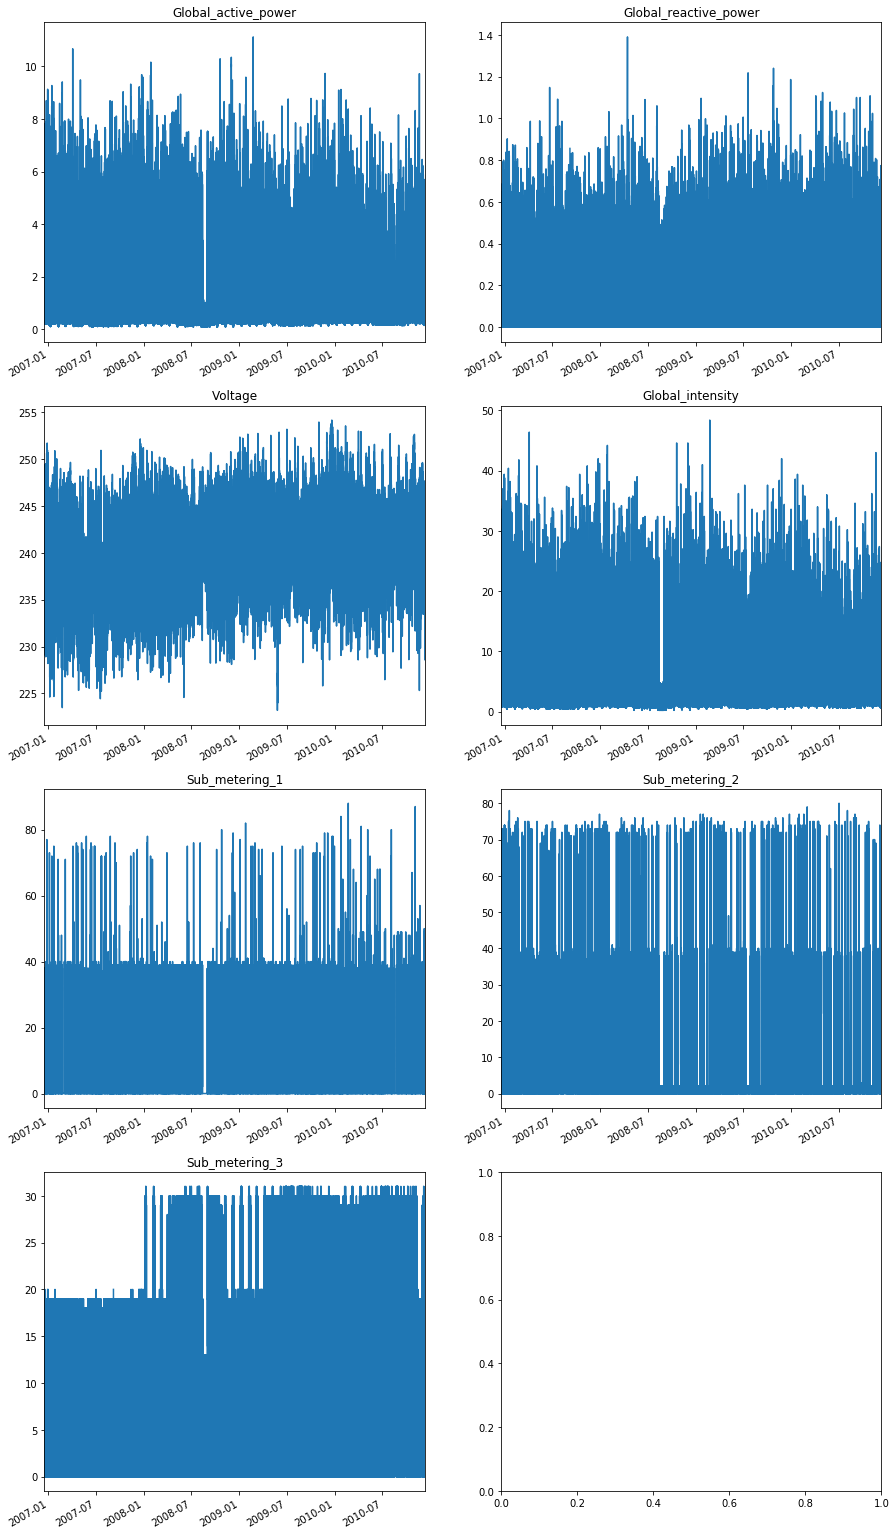

In [24]:
first = 2000
fig, axes = plt.subplots(4,2,figsize=(15,30))
n=1
for i in range(4):
    for j in range(2):
        n+=1
        if n<len(powerdata.columns):
            powerdata.iloc[:,n].plot(ax=axes[i,j])
            axes[i,j].set_title(powerdata.columns[n])
plt.show()

In [19]:
powerdata.columns.shape

(9,)